---
# Imports

In [1]:
# current filepath system leaves plenty to be desired
import sys
local_path = '/Users/hinzlehome/codeup-data-science/anomaly-detection-exercises/'
sys.path.insert(0, local_path)

# imports.py in /utils/
from utils.imports import *

# plotting magic
%matplotlib inline
# plotting defaults
plt.rc('figure', figsize=(16, 9))
plt.style.use('seaborn-darkgrid')
plt.rc('font', size=16)
# plt.style.available
# ^^^ show available seaborn styles

# !!! Warning !!! 
# *** no more warnings ***
# import warnings
# warnings.filterwarnings("ignore")

# custom mods
# from utils.tidy import *
# from utils.model import *


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


---
# gorcery_db

## *Acquire*

In [2]:
# # first run
# url=get_db_url('grocery_db')
# df = pd.read_sql('SELECT * FROM grocery_customers', url)
# df.to_csv('/Users/hinzlehome/codeup-data-science/anomaly-detection-exercises/csv/grocery_db.csv',index=False)
# cached
df = pd.read_csv('/Users/hinzlehome/codeup-data-science/anomaly-detection-exercises/csv/grocery_db.csv')

## *Prepare*

In [3]:
# df=df.drop('customer_id',axis=1)
df=df.astype("float32", copy = False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       440 non-null    float32
 1   Channel           440 non-null    float32
 2   Region            440 non-null    float32
 3   Fresh             440 non-null    float32
 4   Milk              440 non-null    float32
 5   Grocery           440 non-null    float32
 6   Frozen            440 non-null    float32
 7   Detergents_Paper  440 non-null    float32
 8   Delicassen        440 non-null    float32
dtypes: float32(9)
memory usage: 15.6 KB


In [5]:
df.head()

,customer_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.0,2.0,3.0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,1.0,2.0,3.0,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,2.0,2.0,3.0,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0
3,3.0,1.0,3.0,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,4.0,2.0,3.0,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0


In [6]:
# df.Grocery.plot.box()

In [7]:
# sns.scatterplot(df.Grocery, df.Fresh, df.Frozen)
# plt.show()


In [8]:
# cols=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
cols = df.columns

cols

Index(['customer_id', 'Channel', 'Region', 'Fresh', 'Milk', 'Grocery',
       'Frozen', 'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [9]:
df = StandardScaler().fit_transform(df)

In [10]:
df=pd.DataFrame(df, columns=cols)

In [11]:
dbsc = DBSCAN(eps = .75, min_samples = 15).fit(df)

In [12]:
df['labels'] = dbsc.labels_
df.labels.value_counts()

-1    300
 0     67
 2     46
 1     27
Name: labels, dtype: int64

In [13]:
omg=pd.melt(df,id_vars=['labels'],value_vars=cols)

In [14]:
omg.head()

,labels,variable,value
0,-1,customer_id,-1.728119
1,-1,customer_id,-1.720246
2,-1,customer_id,-1.712373
3,-1,customer_id,-1.704500
4,-1,customer_id,-1.696627


## *Clusters*

It looks like the clustering algo tried to primarily sort by region because each category has only one region.

<AxesSubplot:xlabel='variable', ylabel='value'>

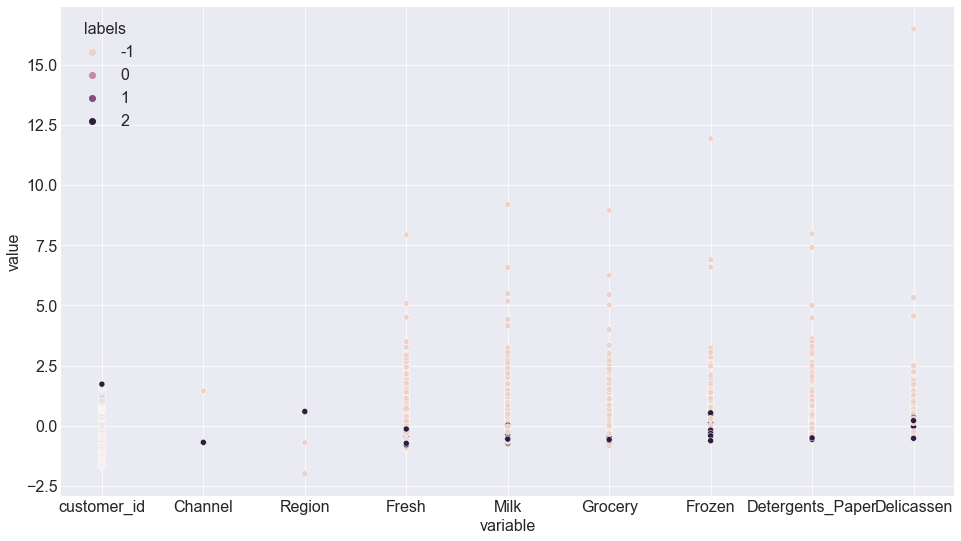

In [15]:
sns.scatterplot(data=omg, x='variable',y='value', hue='labels')

<AxesSubplot:xlabel='variable', ylabel='value'>

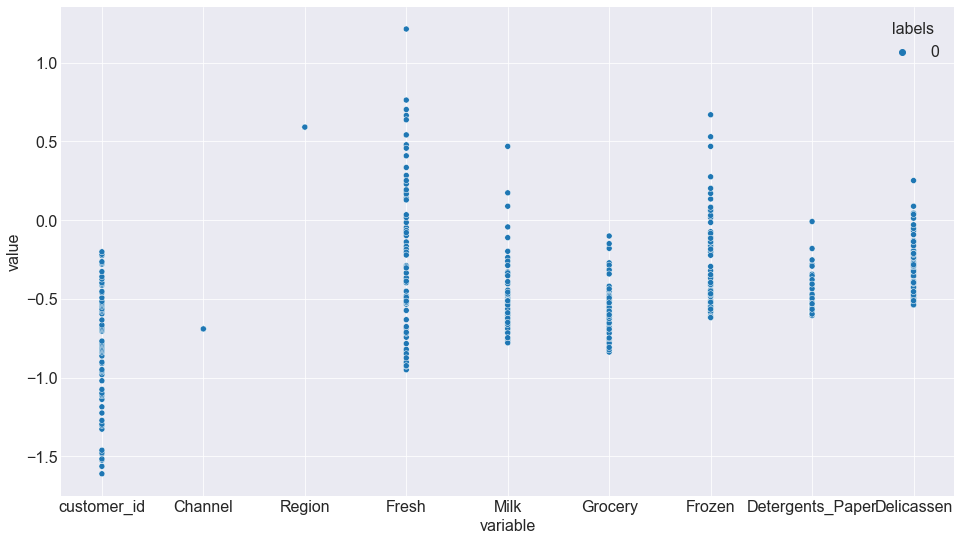

In [16]:
sns.scatterplot(data=omg[omg.labels==0], x='variable',y='value', hue='labels')

<AxesSubplot:xlabel='variable', ylabel='value'>

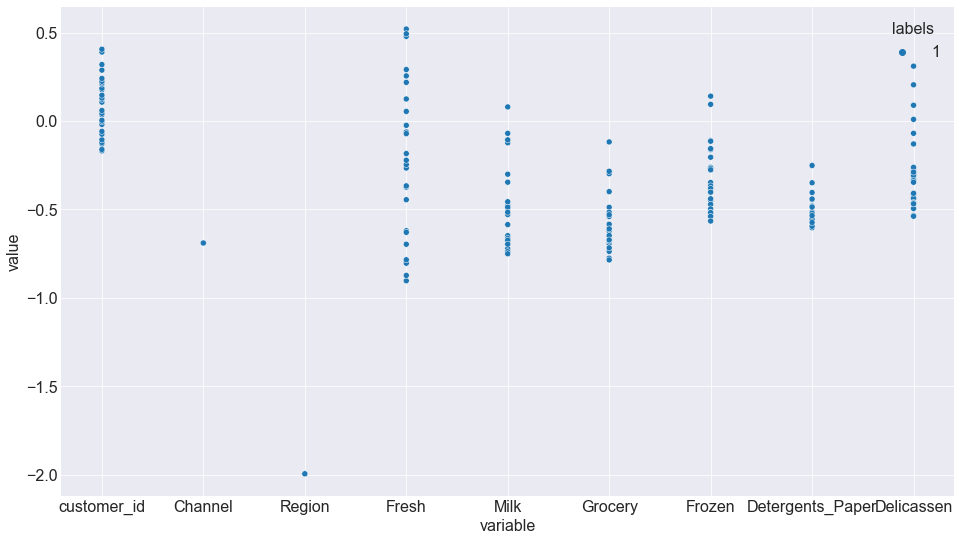

In [17]:
sns.scatterplot(data=omg[omg.labels==1], x='variable',y='value', hue='labels')

<AxesSubplot:xlabel='variable', ylabel='value'>

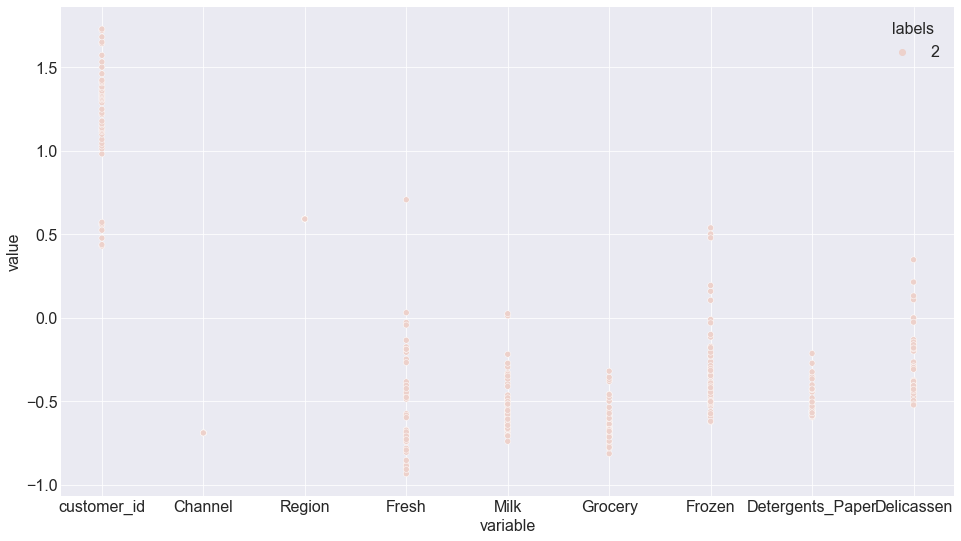

In [18]:
sns.scatterplot(data=omg[omg.labels==2], x='variable',y='value', hue='labels')

---
# curriculum_logs

## *Acquire*

In [29]:
# # first run
# url=get_db_url('curriculum_logs')
# df = pd.read_sql('''
# 	SELECT *
# 	FROM logs
# 	LEFT JOIN cohorts 
# 	ON logs.cohort_id=cohorts.id
# 	;''', url)
# df.to_csv('/Users/hinzlehome/codeup-data-science/anomaly-detection-exercises/csv/curriculum_logs.csv',index=False)

# cached
logs = pd.read_csv('/Users/hinzlehome/codeup-data-science/anomaly-detection-exercises/csv/curriculum_logs.csv')

## *Explore*

Takeaways:
- 97.105.19.58 : probably codeup wifi

In [30]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        900223 non-null  object 
 1   time        900223 non-null  object 
 2   path        900222 non-null  object 
 3   user_id     900223 non-null  int64  
 4   cohort_id   847330 non-null  float64
 5   ip          900223 non-null  object 
 6   id          847330 non-null  float64
 7   name        847330 non-null  object 
 8   slack       847330 non-null  object 
 9   start_date  847330 non-null  object 
 10  end_date    847330 non-null  object 
 11  created_at  847330 non-null  object 
 12  updated_at  847330 non-null  object 
 13  deleted_at  0 non-null       float64
 14  program_id  847330 non-null  float64
dtypes: float64(4), int64(1), object(10)
memory usage: 103.0+ MB


In [31]:
logs[df.cohort_id!=0].groupby('ip').count().sort_values('user_id',ascending=False).head()

,date,time,path,user_id,cohort_id,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
ip,,,,,,,,,,,,,,
97.105.19.58,284579,284579,284579,284579,268648,268648,268648,268648,268648,268648,268648,268648,0,268648
97.105.19.61,61662,61662,61662,61662,60530,60530,60530,60530,60530,60530,60530,60530,0,60530
192.171.117.210,9515,9515,9515,9515,9124,9124,9124,9124,9124,9124,9124,9124,0,9124
71.150.217.33,6791,6791,6791,6791,6791,6791,6791,6791,6791,6791,6791,6791,0,6791
76.185.145.231,4754,4754,4754,4754,4754,4754,4754,4754,4754,4754,4754,4754,0,4754


In [24]:
curc=df[['date','time','path','user_id','ip']]

In [25]:
curc.head()

,date,time,path,user_id,ip
0,2018-01-26,09:55:03,/,1,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61


Thanks Alejandro

In [35]:
# Aggregate the data to get the total unique values for date, path, and cohort_id.
id_counts = logs.groupby('user_id')[['date','path','cohort_id']].nunique()
id_counts.head()

,date,path,cohort_id
user_id,,,
1,637,976,2
2,83,151,1
3,107,169,1
4,54,143,1
5,82,197,1


In [36]:
# Here we'll scale the data before building the DBSCAN model.
# Splitting data? Yeah right.

scaler = MinMaxScaler()
id_counts_scaled = pd.DataFrame(scaler.fit_transform(id_counts), columns = id_counts.columns)
id_counts_scaled.head()

,date,path,cohort_id
0,0.768116,1.000000,0.666667
1,0.099034,0.153846,0.333333
2,0.128019,0.172308,0.333333
3,0.064010,0.145641,0.333333
4,0.097826,0.201026,0.333333


In [37]:

# Now let's use DBSCAN to find anomolies in the id_counts dataframe.

db_scan = DBSCAN(eps = 0.1, min_samples = 5)
db_scan.fit(id_counts_scaled)

DBSCAN(eps=0.1)

In [39]:

# Assign the labels created by DBSCAN to the id_counts dataframe.
id_counts['labels'] = db_scan.labels_

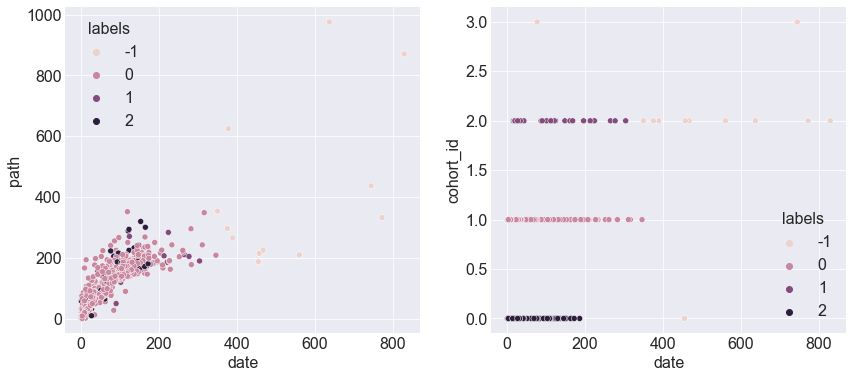

In [40]:

# Now let's see the results.

fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (14, 6))

sns.scatterplot(data = id_counts, x = 'date', y = 'path', hue = 'labels', ax = ax[0])
sns.scatterplot(data = id_counts, x = 'date', y = 'cohort_id', hue = 'labels', ax = ax[1]);

In [41]:

id_counts[id_counts.labels == -1]

,date,path,cohort_id,labels
user_id,,,,
1,637,976,2,-1
11,829,871,2,-1
53,772,333,2,-1
64,744,437,3,-1
88,77,197,3,-1
211,560,210,2,-1
248,378,625,2,-1
314,467,225,2,-1
315,457,215,2,-1


In [42]:
# We'll use this SQL query to select the Zillow data from the database.
sql = '''
SELECT
    bedroomcnt,
    calculatedfinishedsquarefeet
FROM properties_2017
JOIN propertylandusetype
    ON propertylandusetype.propertylandusetypeid = properties_2017.propertylandusetypeid
    AND (propertylandusetype.propertylandusedesc IN ('Single Family Residential', 'Inferred Single Family Residential'))
JOIN predictions_2017 ON properties_2017.parcelid = predictions_2017.parcelid
AND predictions_2017.transactiondate LIKE '2017%%';
'''

# Download the data from the MySQL database.
zillow = pd.read_sql(sql, get_db_url('zillow'))
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    52441 non-null  float64
 1   calculatedfinishedsquarefeet  52359 non-null  float64
dtypes: float64(2)
memory usage: 819.5 KB


In [43]:

# Let's drop all the nulls so we have a clean dataframe.
zillow = zillow.dropna()
zillow.isnull().sum()

bedroomcnt                      0
calculatedfinishedsquarefeet    0
dtype: int64

In [44]:
# Now let's scale the data before creating the DBSCAN model.
# Splitting data is for over-achievers.
scaler = MinMaxScaler()
zillow_scaled = pd.DataFrame(scaler.fit_transform(zillow), columns = zillow.columns)
zillow_scaled.head(2)

,bedroomcnt,calculatedfinishedsquarefeet
0,0.285714,0.136324
1,0.142857,0.061327


In [45]:
# Now let's create and fit the DBSCAN model on our un-split data.
db_scan = DBSCAN(eps = 0.1, min_samples = 20)
db_scan.fit(zillow_scaled)

DBSCAN(eps=0.1, min_samples=20)

In [46]:
# Now we can assign the labels created by DBSCAN to the original dataframe.
zillow['labels'] = db_scan.labels_

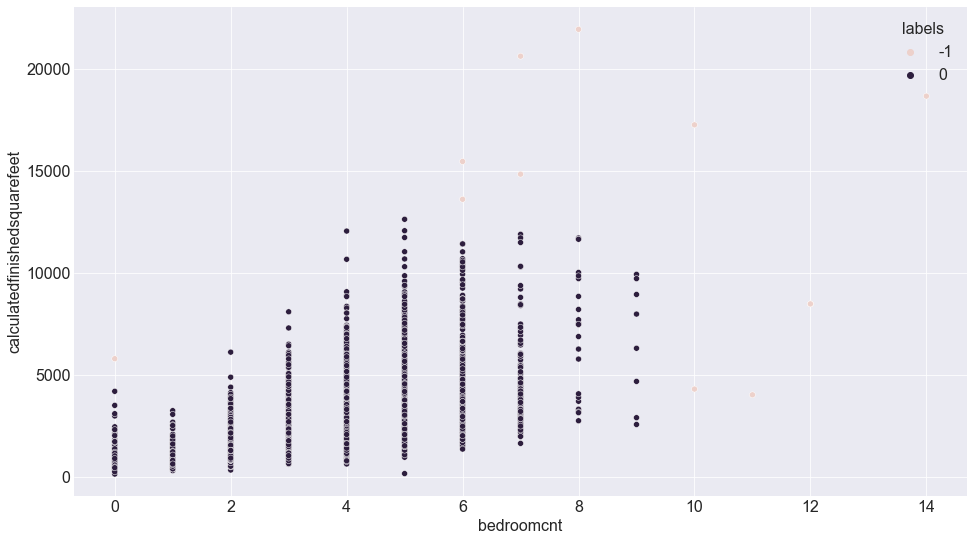

In [47]:

# Finally let's see the results.

sns.scatterplot(data = zillow, x = 'bedroomcnt', y = 'calculatedfinishedsquarefeet', hue = 'labels');

In [48]:

# Let's see the rows that were labeled as anomalies.
zillow[zillow.labels == -1]

,bedroomcnt,calculatedfinishedsquarefeet,labels
590,0.0,5782.0,-1
4864,8.0,21929.0,-1
5740,14.0,18654.0,-1
16571,7.0,20612.0,-1
21981,11.0,4012.0,-1
27017,6.0,13598.0,-1
28105,6.0,15450.0,-1
29557,12.0,8469.0,-1
29558,12.0,8469.0,-1
29559,12.0,8469.0,-1
